# EE0005 Group Project

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import math
sb.set()


    Age | Objective Feature | age | int (days)
    Height | Objective Feature | height | int (cm) |
    Weight | Objective Feature | weight | float (kg) |
    Gender | Objective Feature | gender | categorical code |
    Systolic blood pressure | Examination Feature | ap_hi | int |
    Diastolic blood pressure | Examination Feature | ap_lo | int |
    Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |
    Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |
    Smoking | Subjective Feature | smoke | binary |
    Alcohol intake | Subjective Feature | alco | binary |
    Physical activity | Subjective Feature | active | binary |
    Presence or absence of cardiovascular disease | Target Variable | cardio | binary |


In [2]:
heartdata = pd.read_csv('cardio_train.csv')
heartdata.head(n = 10000)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,14249,20427,1,166,65.0,130,80,1,1,0,0,0,0
9996,14251,18214,1,160,93.0,140,80,2,1,0,0,1,1
9997,14252,14665,1,158,66.0,130,90,2,2,0,0,1,0
9998,14253,18328,1,168,70.0,160,80,3,1,0,0,1,1


In [3]:
heartdata.shape

(70000, 13)

In [4]:
heartdata.dtypes

id               int64
age              int64
gender           int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int64
dtype: object

In [5]:
heartdata['years'] = (heartdata['age']/365).round().astype('int')
years = pd.DataFrame(heartdata['years'])
years.head()

,years
0,50
1,55
2,52
3,48
4,48


In [6]:
height = pd.DataFrame(heartdata['height'])
height.head()

,height
0,168
1,156
2,165
3,169
4,156


In [7]:
weight = pd.DataFrame(heartdata['weight'])
weight.head()

,weight
0,62.0
1,85.0
2,64.0
3,82.0
4,56.0


In [8]:
heartdata['bmi'] = heartdata['weight'] / (heartdata['height']/100)**2
bmi = pd.DataFrame(heartdata['bmi'])
bmi.head()

,bmi
0,21.967120
1,34.927679
2,23.507805
3,28.710479
4,23.011177


MAP is Mean Arterial Pressure

In [9]:
heartdata['MAP'] = ((2 * heartdata['ap_lo'] + heartdata['ap_hi'])/3)
MAP = pd.DataFrame(heartdata['MAP'])
MAP.head()

,MAP
0,90.000000
1,106.666667
2,90.000000
3,116.666667
4,73.333333


In [10]:
newheartdata = heartdata.drop(columns = ['id', 'age'])

In [11]:
newheartdata.head()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,years,bmi,MAP
0,2,168,62.0,110,80,1,1,0,0,1,0,50,21.967120,90.000000
1,1,156,85.0,140,90,3,1,0,0,1,1,55,34.927679,106.666667
2,1,165,64.0,130,70,3,1,0,0,0,1,52,23.507805,90.000000
3,2,169,82.0,150,100,1,1,0,0,1,1,48,28.710479,116.666667
4,1,156,56.0,100,60,1,1,0,0,0,0,48,23.011177,73.333333


In [12]:
newheartdata.describe()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,years,bmi,MAP
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700,53.338686,27.556513,107.359371
std,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003,6.765294,6.091511,136.493690
min,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,30.000000,3.471784,-41.666667
25%,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,48.000000,23.875115,93.333333
50%,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,54.000000,26.374068,93.333333
75%,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,58.000000,30.222222,103.333333
max,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,65.000000,298.666667,7400.000000


# Start of Exploratory Analysis

In [13]:
male_df = newheartdata[newheartdata['gender'] == 1]
male_df

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,years,bmi,MAP
1,1,156,85.0,140,90,3,1,0,0,1,1,55,34.927679,106.666667
2,1,165,64.0,130,70,3,1,0,0,0,1,52,23.507805,90.000000
4,1,156,56.0,100,60,1,1,0,0,0,0,48,23.011177,73.333333
5,1,151,67.0,120,80,2,2,0,0,0,0,60,29.384676,93.333333
6,1,157,93.0,130,80,3,1,0,0,1,0,61,37.729725,96.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69993,1,172,70.0,130,90,1,1,0,0,1,1,54,23.661439,103.333333
69994,1,165,80.0,150,80,1,1,0,0,1,1,58,29.384757,103.333333
69996,1,158,126.0,140,90,2,2,0,0,1,1,62,50.472681,106.666667
69998,1,163,72.0,135,80,1,2,0,0,0,1,61,27.099251,98.333333


In [14]:
male_df.drop(male_df[(male_df['ap_hi'] > male_df['ap_hi'].quantile(0.975)) | (male_df['ap_hi'] < male_df['ap_hi'].quantile(0.025))].index,inplace=True)
male_df.drop(male_df[(male_df['ap_lo'] > male_df['ap_lo'].quantile(0.975)) | (male_df['ap_lo'] < male_df['ap_lo'].quantile(0.025))].index,inplace=True)
male_df.drop(male_df[(male_df['bmi'] > male_df['bmi'].quantile(0.975)) | (male_df['bmi'] < male_df['bmi'].quantile(0.025))].index,inplace=True)

C:\Users\vince\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [15]:
male_df.describe()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,years,bmi,MAP
count,40554.0,40554.000000,40554.000000,40554.000000,40554.000000,40554.000000,40554.000000,40554.000000,40554.000000,40554.000000,40554.000000,40554.000000,40554.000000,40554.000000
mean,1.0,161.603640,71.996589,125.357425,80.753440,1.373971,1.230088,0.016916,0.024708,0.802042,0.490802,53.523721,27.615459,95.621435
std,0.0,6.591708,11.876450,13.948638,8.342884,0.687334,0.579575,0.128957,0.155235,0.398465,0.499922,6.628574,4.603173,9.425665
min,1.0,120.000000,30.000000,100.000000,60.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,30.000000,20.028842,73.333333
25%,1.0,157.000000,64.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,50.000000,23.951227,93.333333
50%,1.0,162.000000,70.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,54.000000,26.672763,93.333333
75%,1.0,166.000000,80.000000,130.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,58.000000,30.487805,103.333333
max,1.0,198.000000,134.000000,163.000000,100.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,65.000000,41.091387,121.000000


New male_df count = 40554

In [16]:
female_df = newheartdata[newheartdata['gender'] == 2]
female_df

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,years,bmi,MAP
0,2,168,62.0,110,80,1,1,0,0,1,0,50,21.967120,90.000000
3,2,169,82.0,150,100,1,1,0,0,1,1,48,28.710479,116.666667
7,2,178,95.0,130,90,3,3,0,0,1,1,62,29.983588,103.333333
11,2,173,60.0,120,80,1,1,0,0,1,0,52,20.047446,93.333333
12,2,165,60.0,120,80,1,1,0,0,0,0,41,22.038567,93.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69981,2,182,110.0,130,90,2,2,0,0,1,1,48,33.208550,103.333333
69984,2,168,80.0,120,80,1,1,0,0,1,1,49,28.344671,93.333333
69986,2,180,78.0,120,80,1,1,0,0,1,0,50,24.074074,93.333333
69995,2,168,76.0,120,80,1,1,1,0,1,0,53,26.927438,93.333333


In [17]:
female_df.drop(female_df[(female_df['ap_hi'] > female_df['ap_hi'].quantile(0.975)) | (female_df['ap_hi'] < female_df['ap_hi'].quantile(0.025))].index,inplace=True)
female_df.drop(female_df[(female_df['ap_lo'] > female_df['ap_lo'].quantile(0.975)) | (female_df['ap_lo'] < female_df['ap_lo'].quantile(0.025))].index,inplace=True)
female_df.drop(female_df[(female_df['bmi'] > female_df['bmi'].quantile(0.975)) | (female_df['bmi'] < female_df['bmi'].quantile(0.025))].index,inplace=True)

C:\Users\vince\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [18]:
female_df.describe()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,years,bmi,MAP
count,21500.0,21500.000000,21500.000000,21500.000000,21500.000000,21500.000000,21500.000000,21500.000000,21500.000000,21500.000000,21500.000000,21500.000000,21500.000000,21500.000000
mean,2.0,170.025116,76.808688,127.487860,82.305070,1.323488,1.203256,0.214233,0.103023,0.806744,0.497116,53.119488,26.522601,97.366000
std,0.0,6.651682,12.074933,13.970136,7.571438,0.647340,0.544660,0.410298,0.303996,0.394861,0.500003,6.934840,3.562157,8.928679
min,2.0,125.000000,40.000000,100.000000,69.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,39.000000,19.921875,79.333333
25%,2.0,166.000000,68.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,48.000000,23.875115,93.333333
50%,2.0,170.000000,75.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,54.000000,25.909457,93.333333
75%,2.0,174.000000,85.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,58.000000,28.731747,103.333333
max,2.0,198.000000,128.000000,170.000000,100.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,65.000000,36.934160,123.333333


New female_df count = 21500

# Classification Tree for Male

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.7264761904761905

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.7236571428571429



<AxesSubplot:>

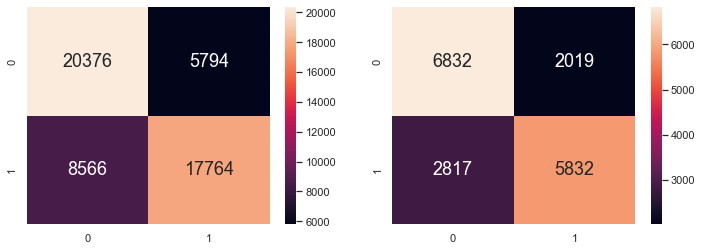

In [122]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Extract Response and Predictors
predictors = ["cholesterol", "smoke", "gluc", "ap_lo", "alco", "active","gender", "ap_hi", "weight", "height"]

# Recall the Legendary-Total Dataset
y = pd.DataFrame(newheartdata['cardio'])   # Response
X = pd.DataFrame(newheartdata[predictors])       # Predictor

# Split the Legendary-Total Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25) 
#capital X denotes variables in a matrix, while small letter y denotes a vector

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 2)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

# Predict Legendary values corresponding to Total
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

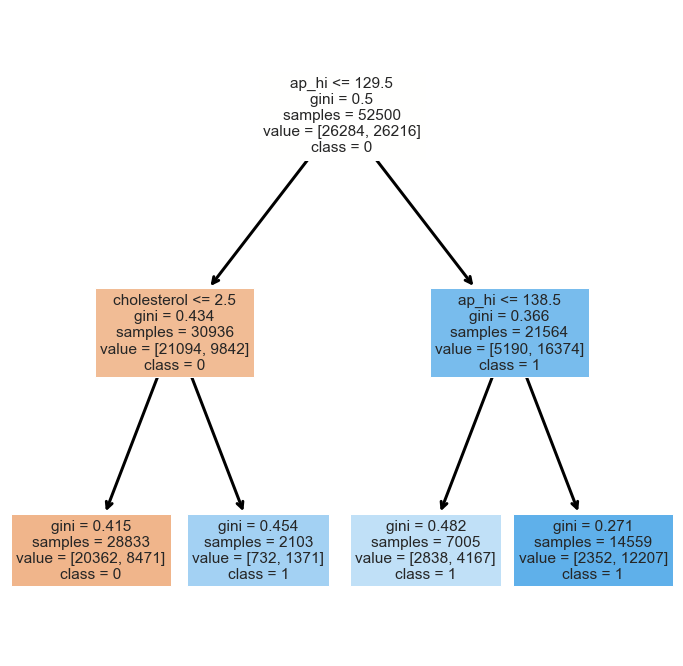

In [26]:
# Plot the trained Decision Tree
from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize=(12, 12))
out = plot_tree(dectree, 
          feature_names = X_train.columns,
          class_names = [str(x) for x in dectree.classes_],
          filled=True)

for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(3)
        
plt.show()

# Classification Tree for Female

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.7195658914728682

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.7142325581395349



<AxesSubplot:>

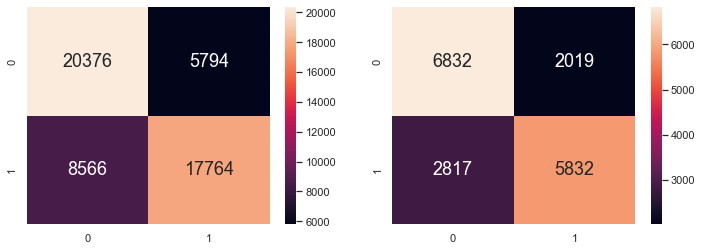

In [123]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Extract Response and Predictors
predictors = ["cholesterol", "smoke", "gluc", "ap_lo", "alco", "active","gender", "ap_hi", "weight", "height"]

# Recall the Legendary-Total Dataset
b = pd.DataFrame(female_df['cardio'])   # Response
A = pd.DataFrame(female_df[predictors])       # Predictor

# Split the Legendary-Total Dataset into Train and Test
A_train, A_test, b_train, b_test = train_test_split(A, b, test_size = 0.25) 
#capital X denotes variables in a matrix, while small letter y denotes a vector

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 4)  # create the decision tree object
dectree.fit(A_train, b_train)                    # train the decision tree model

# Predict Legendary values corresponding to Total
b_train_pred = dectree.predict(A_train)
b_test_pred = dectree.predict(A_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(A_train, b_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(A_test, b_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

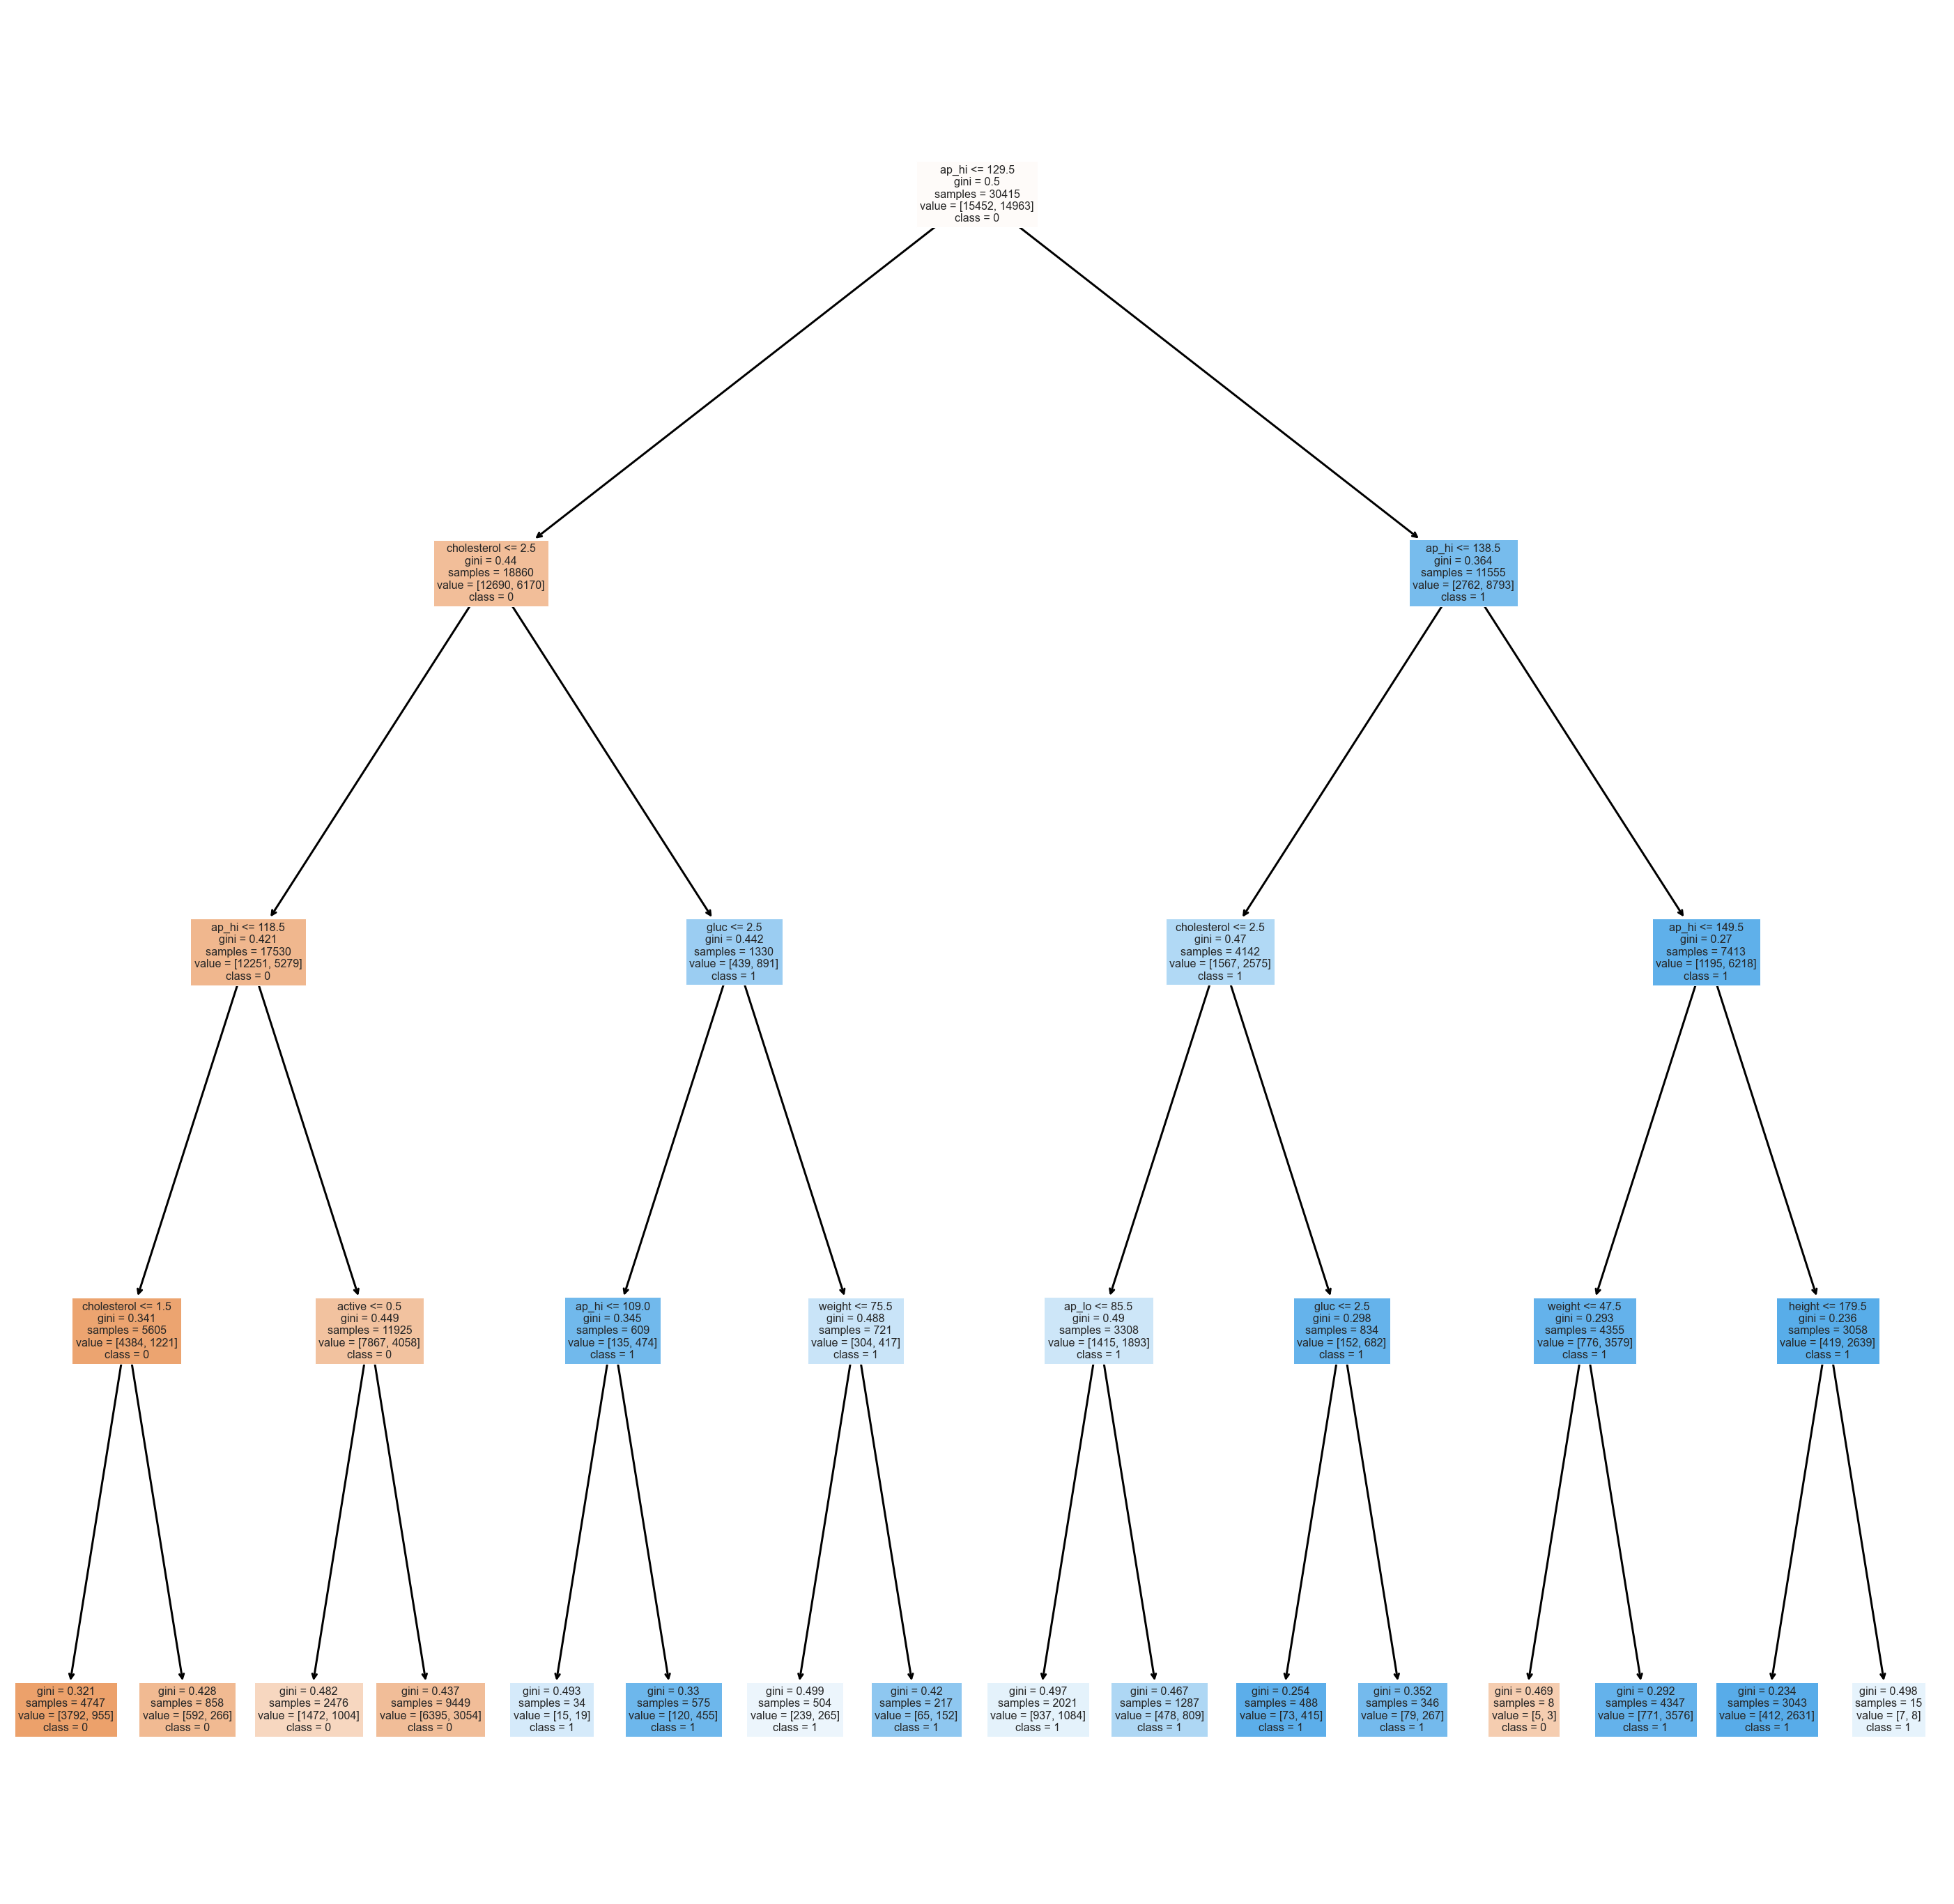

In [28]:
# Plot the trained Decision Tree
from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize=(50, 50))
out = plot_tree(dectree, 
          feature_names = A_train.columns,
          class_names = [str(a) for a in dectree.classes_],
          filled=True)

for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(3)
        
plt.show()

# Logistic Regression for Males

In [29]:
feature_cols = ['height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc',
                'smoke','alco', 'active', 'bmi', 'MAP']

MaleA = male_df[feature_cols]
Maleb = male_df.cardio

In [30]:
from sklearn.model_selection import train_test_split
MaleA_train, MaleA_test, Maleb_train, Maleb_test = train_test_split(MaleA, Maleb,
                                                                   test_size = 0.25, random_state = 0)

In [31]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(MaleA_train, Maleb_train)

Maleb_pred = logreg.predict(MaleA_test)

print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(MaleA_test, Maleb_test)))

Accuracy of logistic regression classifier on test set: 0.71


C:\Users\vince\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [32]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(Maleb_test, Maleb_pred)
cnf_matrix

array([[4055, 1059],
       [1859, 3166]], dtype=int64)

Text(0.5, 257.44, 'Predicted Cardio')

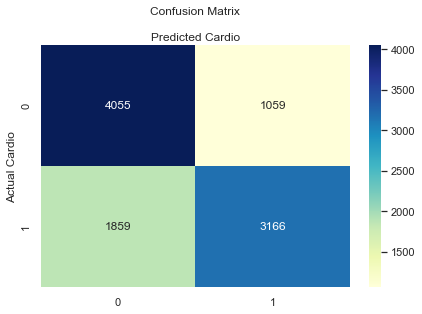

In [33]:
class_names = [0,1]
fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sb.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion Matrix', y = 1.1)
plt.ylabel('Actual Cardio')
plt.xlabel('Predicted Cardio')

In [34]:
print("Accuracy:",metrics.accuracy_score(Maleb_test, Maleb_pred))
print("Precision:",metrics.precision_score(Maleb_test, Maleb_pred))
print("Recall:",metrics.recall_score(Maleb_test, Maleb_pred))

Accuracy: 0.7122004142420357
Precision: 0.7493491124260355
Recall: 0.630049751243781


# Logistic Regression for Females

In [35]:
feature_cols = ['height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc'
                , 'alco', 'active', 'bmi', 'MAP']
FemaleA = female_df[feature_cols]
Femaleb = female_df.cardio

In [36]:
from sklearn.model_selection import train_test_split
#a = x, b = y
FemaleA_train, FemaleA_test, Femaleb_train, Femaleb_test = train_test_split(FemaleA,Femaleb,test_size = 0.25, 
                                                    random_state = 0)

In [37]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(FemaleA_train, Femaleb_train)

Femaleb_pred = logreg.predict(FemaleA_test)

print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(FemaleA_test, Femaleb_test)))

Accuracy of logistic regression classifier on test set: 0.72


C:\Users\vince\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [38]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(Femaleb_test, Femaleb_pred)
cnf_matrix

array([[2143,  565],
       [ 952, 1715]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

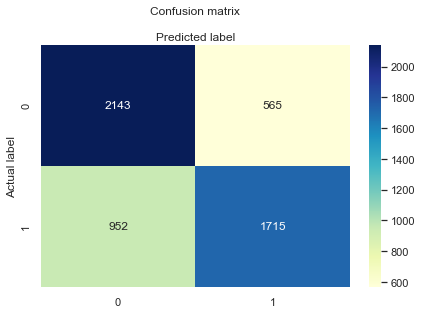

In [39]:
class_names = ['Yes', 'No']
fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sb.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [40]:
print("Accuracy:",metrics.accuracy_score(Femaleb_test, Femaleb_pred))
print("Precision:",metrics.precision_score(Femaleb_test, Femaleb_pred))
print("Recall:",metrics.recall_score(Femaleb_test, Femaleb_pred))

Accuracy: 0.7177674418604651
Precision: 0.7521929824561403
Recall: 0.6430446194225722


# Data Visualisation

## Male plots

In [41]:
maleDF = pd.DataFrame(male_df) 
maleDF

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,years,bmi,MAP
1,1,156,85.0,140,90,3,1,0,0,1,1,55,34.927679,106.666667
2,1,165,64.0,130,70,3,1,0,0,0,1,52,23.507805,90.000000
4,1,156,56.0,100,60,1,1,0,0,0,0,48,23.011177,73.333333
5,1,151,67.0,120,80,2,2,0,0,0,0,60,29.384676,93.333333
6,1,157,93.0,130,80,3,1,0,0,1,0,61,37.729725,96.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69991,1,159,72.0,130,90,2,2,0,0,1,0,56,28.479886,103.333333
69993,1,172,70.0,130,90,1,1,0,0,1,1,54,23.661439,103.333333
69994,1,165,80.0,150,80,1,1,0,0,1,1,58,29.384757,103.333333
69998,1,163,72.0,135,80,1,2,0,0,0,1,61,27.099251,98.333333


In [42]:
maleSMOKE = pd.DataFrame(maleDF['smoke'])
maleSMOKE

,smoke
1,0
2,0
4,0
5,0
6,0
...,...
69991,0
69993,0
69994,0
69998,0


In [43]:
maleCARDIO = pd.DataFrame(maleDF['cardio'])
maleCARDIO

,cardio
1,1
2,1
4,0
5,0
6,0
...,...
69991,0
69993,1
69994,1
69998,1


In [44]:
maleBMI

,bmi
1,34.927679
2,23.507805
4,23.011177
5,29.384676
6,37.729725
...,...
69991,28.479886
69993,23.661439
69994,29.384757
69998,27.099251


In [45]:
maleMAP

,MAP
1,106.666667
2,90.000000
4,73.333333
5,93.333333
6,96.666667
...,...
69991,103.333333
69993,103.333333
69994,103.333333
69998,98.333333


In [46]:
# Train Set : 30554 samples
malecardio_train = pd.DataFrame(maleCARDIO[:30544])
malesmoke_train = pd.DataFrame(maleSMOKE[:30544])
malebmi_train = pd.DataFrame(maleBMI[:30544])
malemap_train = pd.DataFrame(maleMAP[:30544])

# Test Set : 10000 samples
malecardio_test = pd.DataFrame(maleCARDIO[-10000:])
malesmoke_test = pd.DataFrame(maleSMOKE[-10000:])
malebmi_test = pd.DataFrame(maleBMI[-10000:])
malemap_test = pd.DataFrame(maleMAP[-10000:])

# Check the sample sizes
print("Train Set :", malecardio_train.shape, malesmoke_train.shape, malebmi_train.shape, malemap_train.shape)
print("Test Set  :", malecardio_test.shape, malesmoke_test.shape,  malebmi_test.shape, malemap_test.shape)

Train Set : (30544, 1) (30544, 1) (30544, 1) (30544, 1)
Test Set  : (10000, 1) (10000, 1) (10000, 1) (10000, 1)


In [47]:
type(malecardio_train["cardio"])

pandas.core.series.Series

#### Basic Exploration

Perform basic statistical exploration and visualization on the Train Set.

In [48]:
# Summary Statistics for Legendary Train
malecardio_train["cardio"].value_counts()

0    15544
1    15000
Name: cardio, dtype: int64

In [49]:
# Summary Statistics for Total Train
malecardio_train.describe()

,cardio
count,30544.000000
mean,0.491095
std,0.499929
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


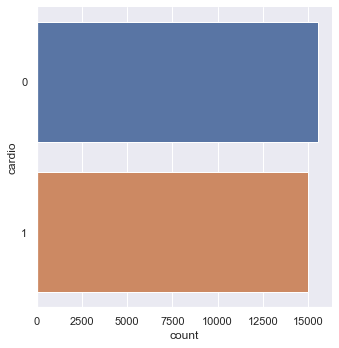

In [50]:
# Count Plot for Legendary Train
sb.catplot(y = "cardio", data = malecardio_train, kind = "count")

<AxesSubplot:>

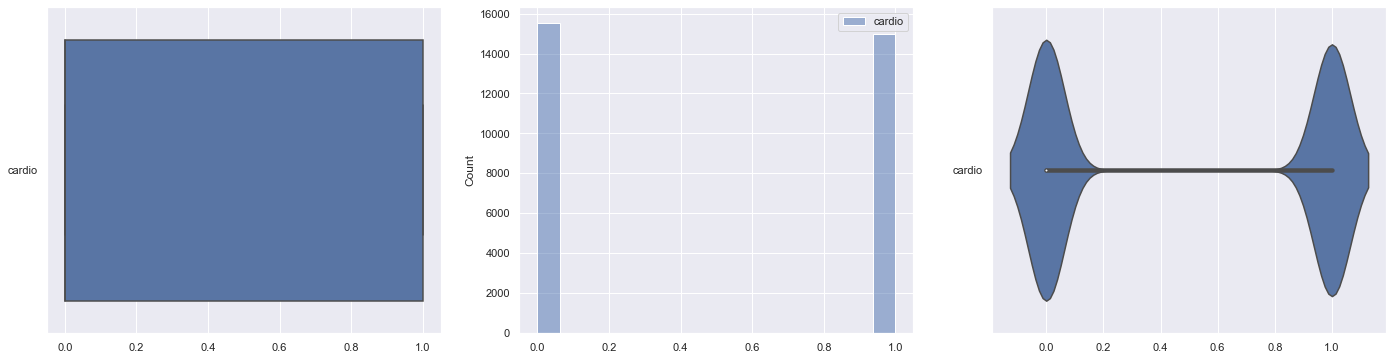

In [51]:
# Plot the distributions of Total Train
f, axes = plt.subplots(1, 3, figsize=(24, 6))
sb.boxplot(data = malecardio_train, orient = "h", ax = axes[0])
sb.histplot(data = malecardio_train, ax = axes[1])
sb.violinplot(data = malecardio_train, orient = "h", ax = axes[2])

# Boxplot for Male Cardio vs BMI

<AxesSubplot:xlabel='bmi', ylabel='cardio'>

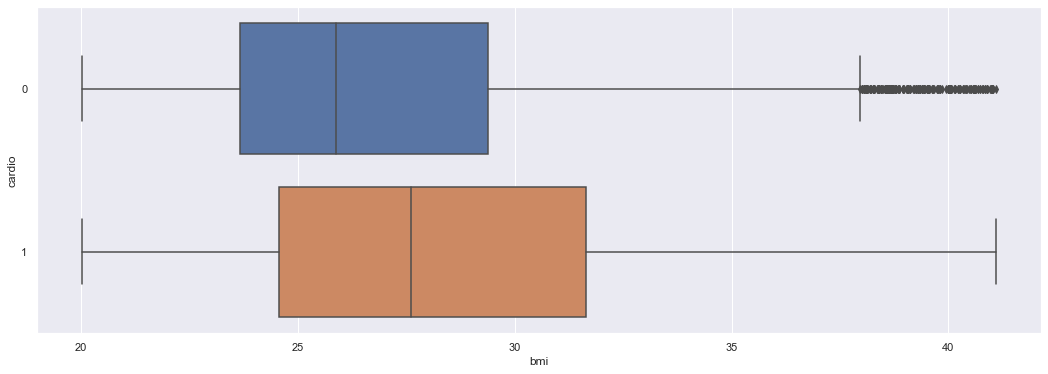

In [52]:
# Create a joint dataframe by concatenating Total and Legendary
trainDF = pd.concat([malecardio_train, malebmi_train], axis = 1).reindex(malecardio_train.index)

# Joint Boxplot of Total Train against Legendary Train
f = plt.figure(figsize=(18, 6))
sb.boxplot(x = "bmi", y = "cardio", data = trainDF, orient = "h")

# Boxplot for Male Cardio vs MAP

<AxesSubplot:xlabel='MAP', ylabel='cardio'>

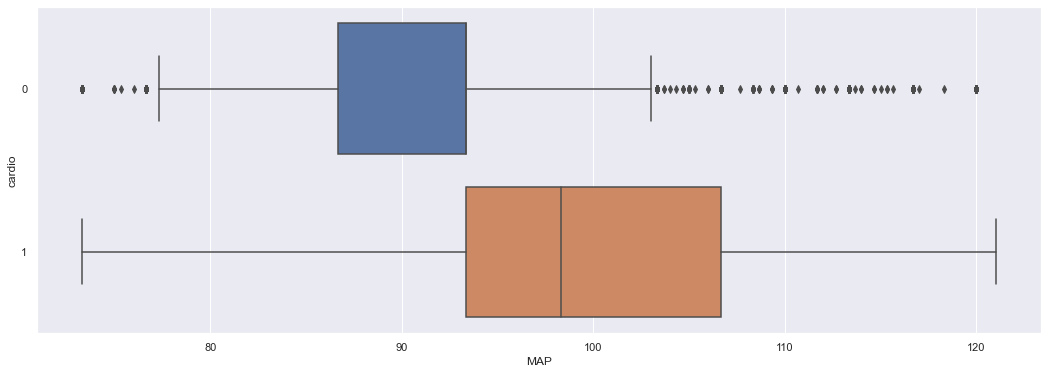

In [53]:
# Create a joint dataframe by concatenating Total and Legendary
trainDF2 = pd.concat([malecardio_train, malemap_train], axis = 1).reindex(malecardio_train.index)

# Joint Boxplot of Total Train against Legendary Train
f = plt.figure(figsize=(18, 6))
sb.boxplot(x = "MAP", y = "cardio", data = trainDF2, orient = "h")

## Female Plots

In [54]:
femaleDF = pd.DataFrame(female_df) 
femaleDF

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,years,bmi,MAP
0,2,168,62.0,110,80,1,1,0,0,1,0,50,21.967120,90.000000
3,2,169,82.0,150,100,1,1,0,0,1,1,48,28.710479,116.666667
7,2,178,95.0,130,90,3,3,0,0,1,1,62,29.983588,103.333333
11,2,173,60.0,120,80,1,1,0,0,1,0,52,20.047446,93.333333
12,2,165,60.0,120,80,1,1,0,0,0,0,41,22.038567,93.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69980,2,167,69.0,110,80,1,1,0,1,0,0,49,24.740937,90.000000
69981,2,182,110.0,130,90,2,2,0,0,1,1,48,33.208550,103.333333
69984,2,168,80.0,120,80,1,1,0,0,1,1,49,28.344671,93.333333
69986,2,180,78.0,120,80,1,1,0,0,1,0,50,24.074074,93.333333


In [55]:
femaleSMOKE = pd.DataFrame(femaleDF['smoke'])
femaleSMOKE

,smoke
0,0
3,0
7,0
11,0
12,0
...,...
69980,0
69981,0
69984,0
69986,0


In [56]:
femaleCARDIO = pd.DataFrame(femaleDF['cardio'])
femaleCARDIO

,cardio
0,0
3,1
7,1
11,0
12,0
...,...
69980,0
69981,1
69984,1
69986,0


In [57]:
femaleBMI

,bmi
0,21.967120
3,28.710479
7,29.983588
11,20.047446
12,22.038567
...,...
69980,24.740937
69981,33.208550
69984,28.344671
69986,24.074074


In [58]:
femaleMAP

,MAP
0,90.000000
3,116.666667
7,103.333333
11,93.333333
12,93.333333
...,...
69980,90.000000
69981,103.333333
69984,93.333333
69986,93.333333


In [59]:
# Train Set : 16125 samples
femalecardio_train = pd.DataFrame(femaleCARDIO[:16125])
femalesmoke_train = pd.DataFrame(femaleSMOKE[:16125])
femalebmi_train = pd.DataFrame(femaleBMI[:16125])
femalemap_train = pd.DataFrame(femaleMAP[:16125])

# Test Set : 5375 samples
femalecardio_test = pd.DataFrame(femaleCARDIO[-5375:])
femalesmoke_test = pd.DataFrame(femaleSMOKE[-5375:])
femalebmi_test = pd.DataFrame(femaleBMI[-5375:])
femalemap_test = pd.DataFrame(femaleMAP[-5375:])

# Check the sample sizes
print("Train Set :", femalecardio_train.shape, femalesmoke_train.shape, femalebmi_train.shape, femalemap_train.shape)
print("Test Set  :", femalecardio_test.shape, femalesmoke_test.shape,  femalebmi_test.shape, femalemap_test.shape)

Train Set : (16125, 1) (16125, 1) (16125, 1) (16125, 1)
Test Set  : (5375, 1) (5375, 1) (5375, 1) (5375, 1)


In [60]:
type(femalecardio_train["cardio"])

pandas.core.series.Series

#### Basic Exploration

Perform basic statistical exploration and visualization on the Train Set.

In [61]:
# Summary Statistics for Legendary Train
femalecardio_train["cardio"].value_counts()

0    8152
1    7973
Name: cardio, dtype: int64

In [62]:
# Summary Statistics for Total Train
femalecardio_train.describe()

,cardio
count,16125.000000
mean,0.494450
std,0.499985
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


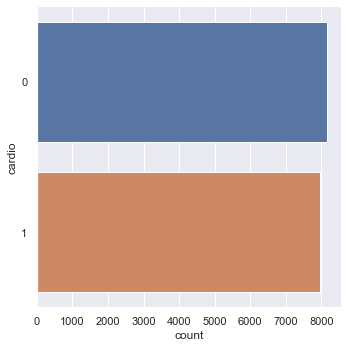

In [63]:
# Count Plot for Legendary Train
sb.catplot(y = "cardio", data = femalecardio_train, kind = "count")

<AxesSubplot:>

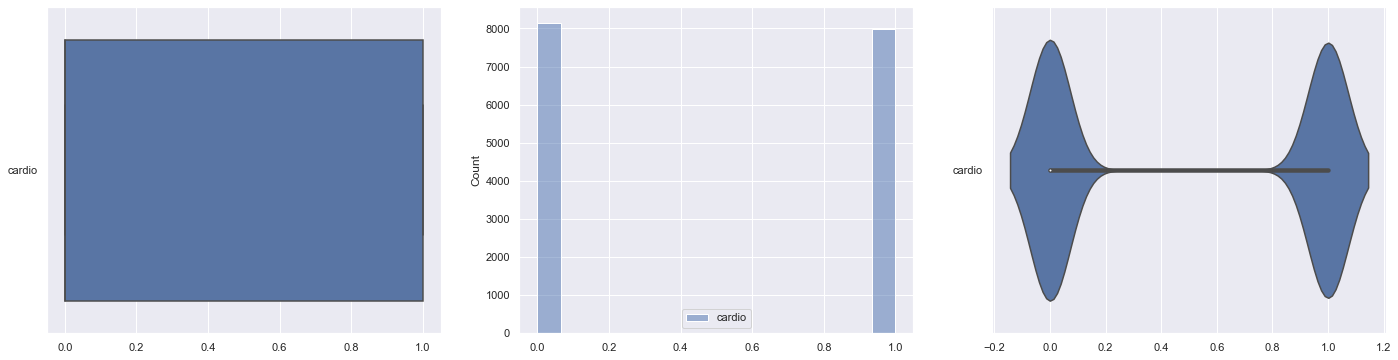

In [64]:
# Plot the distributions of Total Train
f, axes = plt.subplots(1, 3, figsize=(24, 6))
sb.boxplot(data = femalecardio_train, orient = "h", ax = axes[0])
sb.histplot(data = femalecardio_train, ax = axes[1])
sb.violinplot(data = femalecardio_train, orient = "h", ax = axes[2])

# Boxplot for Female Cardio vs BMI

<AxesSubplot:xlabel='bmi', ylabel='cardio'>

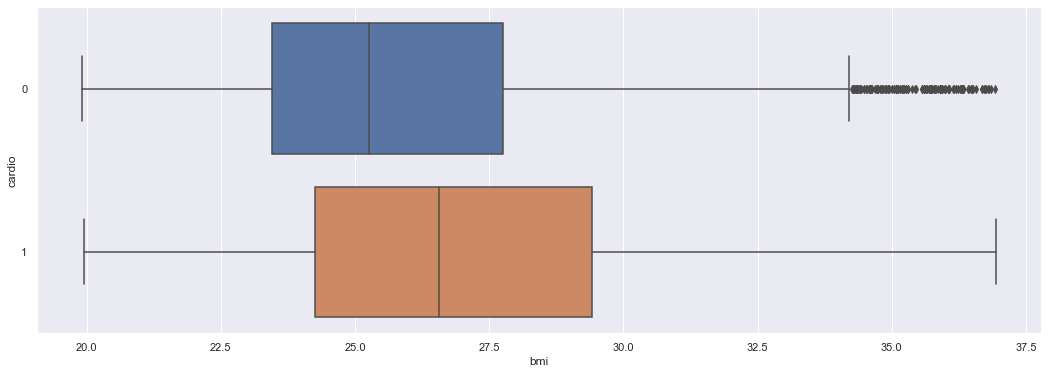

In [65]:
# Create a joint dataframe by concatenating Total and Legendary
trainDF3 = pd.concat([femalecardio_train, femalebmi_train], axis = 1).reindex(femalecardio_train.index)

# Joint Boxplot of Total Train against Legendary Train
f = plt.figure(figsize=(18, 6))
sb.boxplot(x = "bmi", y = "cardio", data = trainDF3, orient = "h")

# Boxplot for Female Cardio vs MAP

<AxesSubplot:xlabel='MAP', ylabel='cardio'>

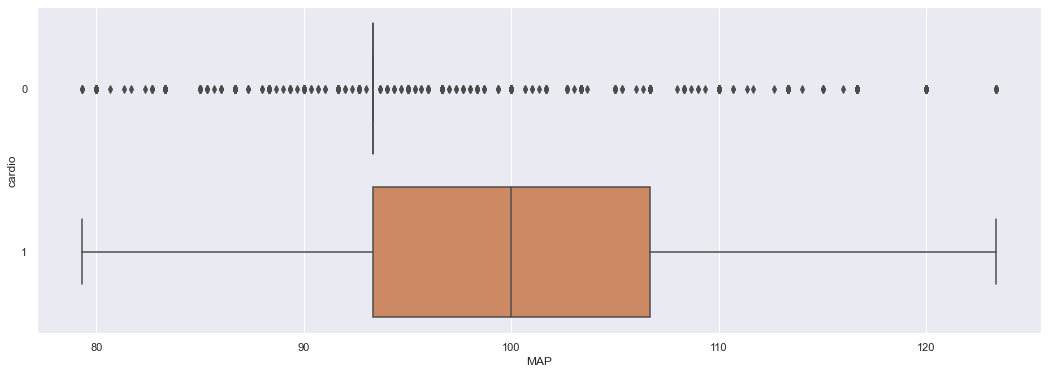

In [66]:
# Create a joint dataframe by concatenating Total and Legendary
trainDF4 = pd.concat([femalecardio_train, femalemap_train], axis = 1).reindex(femalecardio_train.index)

# Joint Boxplot of Total Train against Legendary Train
f = plt.figure(figsize=(18, 6))
sb.boxplot(x = "MAP", y = "cardio", data = trainDF4, orient = "h")

## Exploratory Analysis of male and female comparisons with various categorical data

###### Cholesterol vs presence of Cardiovascular disease

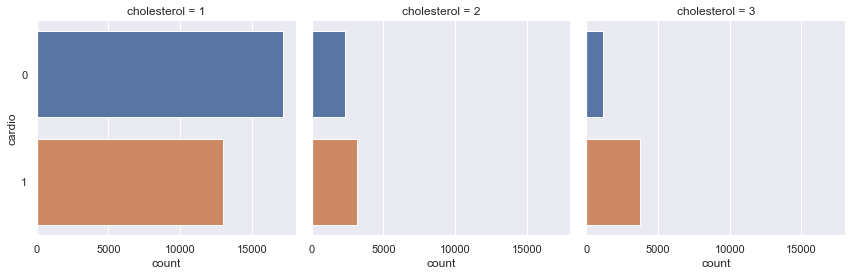

In [67]:
# breakdown of male cholesterol who have cardiovascular disease
sb.catplot(y = 'cardio', data = maleDF, col = 'cholesterol', kind = 'count', col_wrap = 3, height = 4)

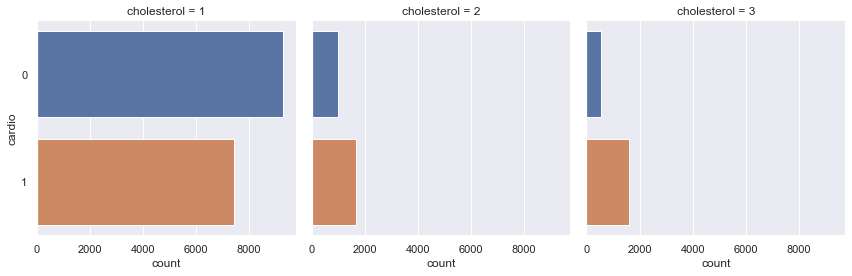

In [68]:
# breakdown of female cholesterol who have cardiovascular disease
sb.catplot(y = 'cardio', data = femaleDF, col = 'cholesterol', kind = 'count', col_wrap = 3, height = 4)

###### Smoking vs presence of Cardiovascular disease

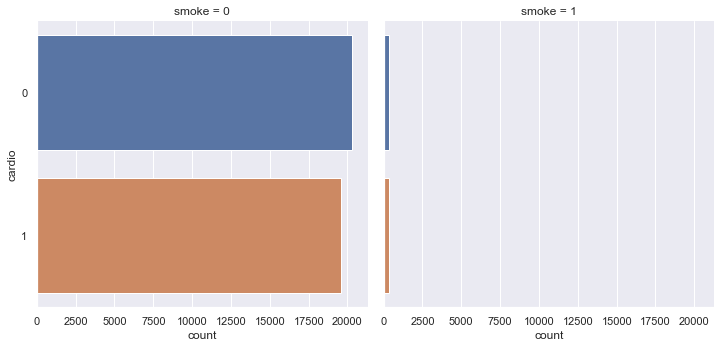

In [69]:
# males who have cardiovascular disease from smoking
sb.catplot(y = 'cardio', data = maleDF, col = 'smoke', kind = 'count', col_wrap = 3, height = 5)

Number of male non-smokers(0) vs smokers(1) surveyed :
0    39868
1      686
Name: smoke, dtype: int64


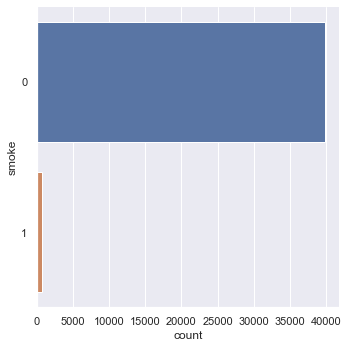

In [70]:
# Male Smokers in the Dataset
print("Number of male non-smokers(0) vs smokers(1) surveyed :")

# Pokemons in each Generation
print(maleDF["smoke"].value_counts())
sb.catplot(y = "smoke", data = maleDF, kind = "count")

##### It may be seen initially that the correlation of smokers and cardiovascular disease for males is not significant. However, this could be due to the fact that only 686 males out of 40554 are smokers, which can be deemed insufficient sample data or an unequal comparison. 
##### What will be done: splitting the dataset into smokers and non-smokers and regrouping them with whether cardiovascular disease is present in the person

In [71]:
# Create a joint dataframe by concatenating the two variables
jointDF_male = pd.concat([maleSMOKE, maleCARDIO], axis = 1).reindex(maleSMOKE.index)
jointDF_male.describe()

,smoke,cardio
count,40554.000000,40554.000000
mean,0.016916,0.490802
std,0.128957,0.499922
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,1.000000
max,1.000000,1.000000


In [72]:
#male; not smoker; no cardio disease

male_nonsmoker_nocardio = jointDF_male[(jointDF_male['smoke'] == 0) & (jointDF_male['cardio'] == 0 )]
male_nonsmoker_nocardio.describe()

,smoke,cardio
count,20284.0,20284.0
mean,0.0,0.0
std,0.0,0.0
min,0.0,0.0
25%,0.0,0.0
50%,0.0,0.0
75%,0.0,0.0
max,0.0,0.0


In [73]:
#male; not smoker; cardio disease present

male_nonsmoker_cardio = jointDF_male[(jointDF_male['smoke'] == 0) & (jointDF_male['cardio'] == 1 )]
male_nonsmoker_cardio.describe()

,smoke,cardio
count,19584.0,19584.0
mean,0.0,1.0
std,0.0,0.0
min,0.0,1.0
25%,0.0,1.0
50%,0.0,1.0
75%,0.0,1.0
max,0.0,1.0


In [74]:
male_nonsmoker = pd.concat([male_nonsmoker_nocardio, male_nonsmoker_cardio])
male_nonsmoker.describe()

,smoke,cardio
count,39868.0,39868.000000
mean,0.0,0.491221
std,0.0,0.499929
min,0.0,0.000000
25%,0.0,0.000000
50%,0.0,0.000000
75%,0.0,1.000000
max,0.0,1.000000


chart of non-smokers, where 0 means no cardiovascular disease and 1 means cardiovascular disease is present 
0    20284
1    19584
Name: cardio, dtype: int64


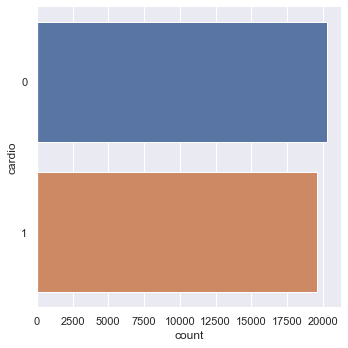

In [75]:
print("chart of non-smokers, where 0 means no cardiovascular disease and 1 means cardiovascular disease is present ")


print(male_nonsmoker["cardio"].value_counts())
sb.catplot(y = "cardio", data = male_nonsmoker, kind = "count")

In [76]:
#male; smoker; no cardio disease

male_smoker_nocardio = jointDF_male[(jointDF_male['smoke'] == 1) & (jointDF_male['cardio'] == 0 )]
male_smoker_nocardio.describe()

,smoke,cardio
count,366.0,366.0
mean,1.0,0.0
std,0.0,0.0
min,1.0,0.0
25%,1.0,0.0
50%,1.0,0.0
75%,1.0,0.0
max,1.0,0.0


In [77]:
#male; smoker; cardio disease present

male_smoker_cardio = jointDF_male[(jointDF_male['smoke'] == 1) & (jointDF_male['cardio'] == 1 )]
male_smoker_cardio.describe()

,smoke,cardio
count,320.0,320.0
mean,1.0,1.0
std,0.0,0.0
min,1.0,1.0
25%,1.0,1.0
50%,1.0,1.0
75%,1.0,1.0
max,1.0,1.0


In [78]:
male_smoker = pd.concat([male_smoker_nocardio, male_smoker_cardio])
male_smoker.describe()

,smoke,cardio
count,686.0,686.000000
mean,1.0,0.466472
std,0.0,0.499239
min,1.0,0.000000
25%,1.0,0.000000
50%,1.0,0.000000
75%,1.0,1.000000
max,1.0,1.000000


chart of smokers, where 0 means no cardiovascular disease and 1 means cardiovascular disease is present
0    366
1    320
Name: cardio, dtype: int64


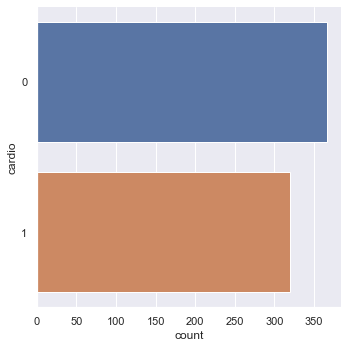

In [79]:
# Generations in the Dataset
print("chart of smokers, where 0 means no cardiovascular disease and 1 means cardiovascular disease is present")

# Pokemons in each Generation
print(male_smoker["cardio"].value_counts())
sb.catplot(y = "cardio", data = male_smoker, kind = "count")

###### Results show that among smokers, the number of smokers who do not have cardiovascular disease is higher than smokers who have it. However, the small sample size may still be too small to come to a concrete conclusion

## Female Analysis

In [80]:
# Create a joint dataframe by concatenating the two variables
jointDF_female = pd.concat([femaleSMOKE, femaleCARDIO], axis = 1).reindex(femaleSMOKE.index)
jointDF_female.describe()

,smoke,cardio
count,21500.000000,21500.000000
mean,0.214233,0.497116
std,0.410298,0.500003
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,1.000000
max,1.000000,1.000000


In [81]:
#female; not smoker; no cardio disease

female_nonsmoker_nocardio = jointDF_female[(jointDF_female['smoke'] == 0) & (jointDF_female['cardio'] == 0 )]
female_nonsmoker_nocardio.describe()

,smoke,cardio
count,8353.0,8353.0
mean,0.0,0.0
std,0.0,0.0
min,0.0,0.0
25%,0.0,0.0
50%,0.0,0.0
75%,0.0,0.0
max,0.0,0.0


In [82]:
#female; not smoker; cardio disease present

female_nonsmoker_cardio = jointDF_female[(jointDF_female['smoke'] == 0) & (jointDF_female['cardio'] == 1 )]
female_nonsmoker_cardio.describe()

,smoke,cardio
count,8541.0,8541.0
mean,0.0,1.0
std,0.0,0.0
min,0.0,1.0
25%,0.0,1.0
50%,0.0,1.0
75%,0.0,1.0
max,0.0,1.0


In [83]:
female_nonsmoker = pd.concat([female_nonsmoker_nocardio, female_nonsmoker_cardio])
female_nonsmoker.describe()

,smoke,cardio
count,16894.0,16894.000000
mean,0.0,0.505564
std,0.0,0.499984
min,0.0,0.000000
25%,0.0,0.000000
50%,0.0,1.000000
75%,0.0,1.000000
max,0.0,1.000000


chart of female non-smokers, where 0 means no cardiovascular disease and 1 means cardiovascular disease is present 
1    8541
0    8353
Name: cardio, dtype: int64


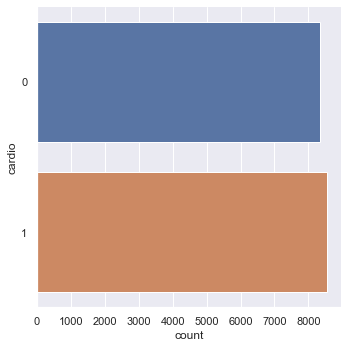

In [84]:
print("chart of female non-smokers, where 0 means no cardiovascular disease and 1 means cardiovascular disease is present ")


print(female_nonsmoker["cardio"].value_counts())
sb.catplot(y = "cardio", data = female_nonsmoker, kind = "count")

In [85]:
#female; smoker; no cardio disease

female_smoker_nocardio = jointDF_female[(jointDF_female['smoke'] == 1) & (jointDF_female['cardio'] == 0 )]
female_smoker_nocardio.describe()

,smoke,cardio
count,2459.0,2459.0
mean,1.0,0.0
std,0.0,0.0
min,1.0,0.0
25%,1.0,0.0
50%,1.0,0.0
75%,1.0,0.0
max,1.0,0.0


In [86]:
#female; smoker; cardio disease present

female_smoker_cardio = jointDF_female[(jointDF_female['smoke'] == 1) & (jointDF_female['cardio'] == 1 )]
female_smoker_cardio.describe()

,smoke,cardio
count,2147.0,2147.0
mean,1.0,1.0
std,0.0,0.0
min,1.0,1.0
25%,1.0,1.0
50%,1.0,1.0
75%,1.0,1.0
max,1.0,1.0


In [87]:
female_smoker = pd.concat([female_smoker_nocardio, female_smoker_cardio])
female_smoker.describe()

,smoke,cardio
count,4606.0,4606.000000
mean,1.0,0.466131
std,0.0,0.498906
min,1.0,0.000000
25%,1.0,0.000000
50%,1.0,0.000000
75%,1.0,1.000000
max,1.0,1.000000


In [88]:
female_smoker = pd.concat([female_smoker_nocardio, female_smoker_cardio])
female_smoker.describe()

,smoke,cardio
count,4606.0,4606.000000
mean,1.0,0.466131
std,0.0,0.498906
min,1.0,0.000000
25%,1.0,0.000000
50%,1.0,0.000000
75%,1.0,1.000000
max,1.0,1.000000


chart of female smokers, where 0 means no cardiovascular disease and 1 means cardiovascular disease is present
0    2459
1    2147
Name: cardio, dtype: int64


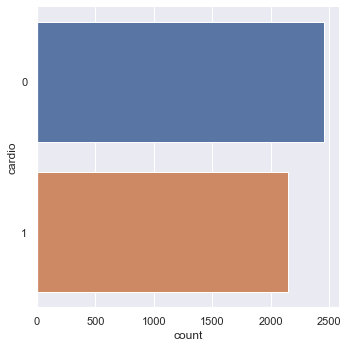

In [89]:
# Generations in the Dataset
print("chart of female smokers, where 0 means no cardiovascular disease and 1 means cardiovascular disease is present")

# Pokemons in each Generation
print(female_smoker["cardio"].value_counts())
sb.catplot(y = "cardio", data = female_smoker, kind = "count")

##### Age (in years) vs presence of Cardiovascular disease

In [90]:
age_inyears = pd.DataFrame(newheartdata['years'])
cardio = pd.DataFrame(newheartdata['cardio'])

In [91]:
age_inyears.describe()

,years
count,70000.000000
mean,53.338686
std,6.765294
min,30.000000
25%,48.000000
50%,54.000000
75%,58.000000
max,65.000000


In [92]:
cardio.describe()

,cardio
count,70000.000000
mean,0.499700
std,0.500003
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [93]:
# Create a joint dataframe by concatenating the two variables
age_jointDF = pd.concat([age_inyears, cardio], axis = 1).reindex(age_inyears.index)
age_jointDF.describe()

,years,cardio
count,70000.000000,70000.000000
mean,53.338686,0.499700
std,6.765294,0.500003
min,30.000000,0.000000
25%,48.000000,0.000000
50%,54.000000,0.000000
75%,58.000000,1.000000
max,65.000000,1.000000


<AxesSubplot:xlabel='cardio', ylabel='years'>

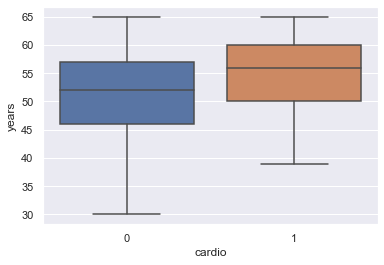

In [94]:
sb.boxplot(y =  age_jointDF['years'], x = age_jointDF['cardio'])

##### Male age (in years) vs presence of Cardiovascular disease

<AxesSubplot:xlabel='cardio', ylabel='years'>

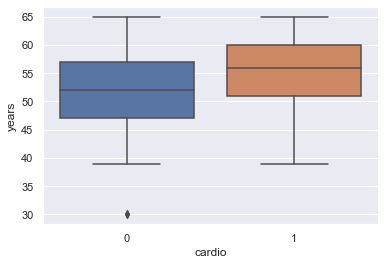

In [95]:
sb.boxplot(y =  maleDF['years'], x = maleDF['cardio'])

##### Female age (in years) vs presence of Cardiovascular disease


<AxesSubplot:xlabel='cardio', ylabel='years'>

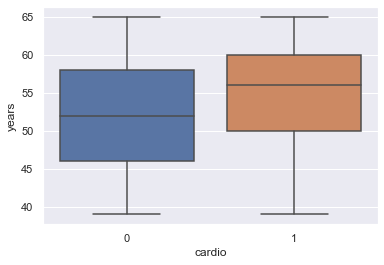

In [96]:
sb.boxplot(y =  femaleDF['years'], x = femaleDF['cardio'])

###### Glucose level vs presence of Cardiovascular disease (M)

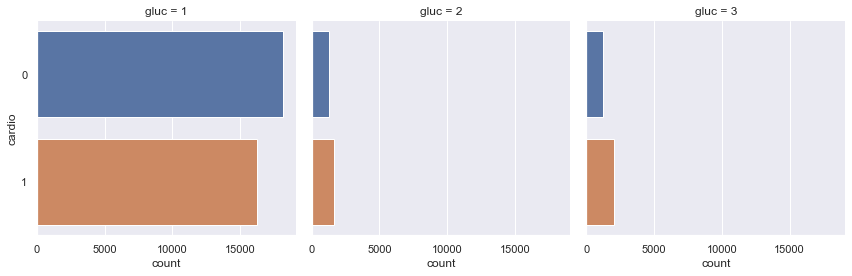

In [97]:
# breakdown of male cholesterol who have cardiovascular disease
sb.catplot(y = 'cardio', data = maleDF, col = 'gluc', kind = 'count', col_wrap = 3, height = 4)

In [98]:
maleGlucAboveNormal = maleDF[(maleDF['gluc'] > 1)]
maleGlucAboveNormal.describe()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,years,bmi,MAP
count,6112.0,6112.000000,6112.000000,6112.000000,6112.000000,6112.000000,6112.000000,6112.000000,6112.000000,6112.000000,6112.000000,6112.000000,6112.000000,6112.000000
mean,1.0,161.055301,74.812091,128.559391,82.240183,2.065609,2.526669,0.019961,0.032395,0.786649,0.600785,54.878109,28.888734,97.679919
std,0.0,6.509881,12.681050,14.535375,8.433686,0.854751,0.499329,0.139877,0.177062,0.409707,0.489777,6.396312,4.892237,9.619578
min,1.0,131.000000,37.000000,100.000000,60.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,39.000000,20.060954,73.333333
25%,1.0,156.000000,65.000000,120.000000,80.000000,1.000000,2.000000,0.000000,0.000000,1.000000,0.000000,50.000000,24.801587,93.333333
50%,1.0,161.000000,73.000000,130.000000,80.000000,2.000000,3.000000,0.000000,0.000000,1.000000,1.000000,56.000000,28.305995,96.666667
75%,1.0,165.000000,83.000000,140.000000,90.000000,3.000000,3.000000,0.000000,0.000000,1.000000,1.000000,60.000000,32.416097,106.666667
max,1.0,198.000000,134.000000,162.000000,100.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,65.000000,41.091387,120.000000


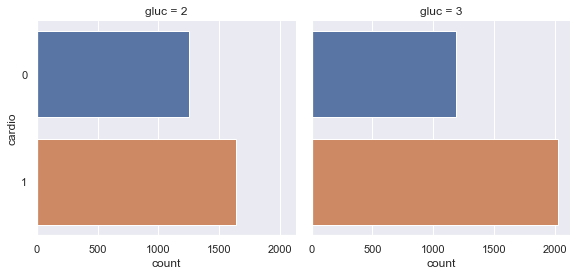

In [99]:
# breakdown of male glucose level above normal who have cardiovascular disease
sb.catplot(y = 'cardio', data = maleGlucAboveNormal, col = 'gluc', kind = 'count', col_wrap = 3, height = 4)

###### Glucose level vs presence of Cardiovascular disease (F)

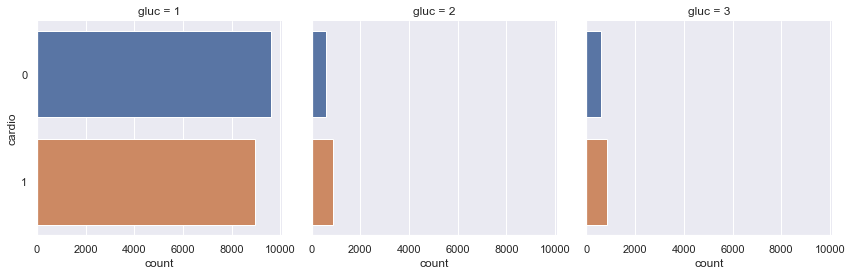

In [100]:
# breakdown of female glucose level who have cardiovascular disease
sb.catplot(y = 'cardio', data = femaleDF, col = 'gluc', kind = 'count', col_wrap = 3, height = 4)

In [101]:
femaleGlucAboveNormal = femaleDF[(femaleDF['gluc'] > 1)]
femaleGlucAboveNormal.describe()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,years,bmi,MAP
count,2922.0,2922.000000,2922.000000,2922.000000,2922.000000,2922.000000,2922.000000,2922.000000,2922.000000,2922.000000,2922.000000,2922.000000,2922.000000,2922.000000
mean,2.0,170.444901,80.646167,130.556468,83.592402,1.930185,2.495551,0.217317,0.114648,0.810062,0.588980,54.614990,27.700457,99.247091
std,0.0,6.642524,12.868649,14.633222,8.070461,0.857885,0.500066,0.412491,0.318651,0.392319,0.492103,6.563306,3.720111,9.450316
min,2.0,140.000000,49.000000,100.000000,69.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,39.000000,20.047446,80.000000
25%,2.0,166.000000,71.000000,120.000000,80.000000,1.000000,2.000000,0.000000,0.000000,1.000000,0.000000,50.000000,24.801587,93.333333
50%,2.0,170.000000,80.000000,130.000000,80.000000,2.000000,2.000000,0.000000,0.000000,1.000000,1.000000,56.000000,27.390919,96.666667
75%,2.0,175.000000,90.000000,140.000000,90.000000,3.000000,3.000000,0.000000,0.000000,1.000000,1.000000,60.000000,30.387144,106.666667
max,2.0,198.000000,125.000000,170.000000,100.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,65.000000,36.932124,123.333333


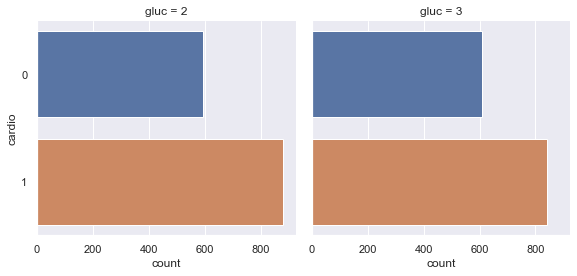

In [102]:
# breakdown of female glucose level above normal who have cardiovascular disease
sb.catplot(y = 'cardio', data = femaleGlucAboveNormal, col = 'gluc', kind = 'count', col_wrap = 3, height = 4)

###### Alcohol consumption vs presence of Cardiovascular disease

In [103]:
alcoConsump = pd.DataFrame(newheartdata['alco'])

In [104]:
# Create a joint dataframe by concatenating the two variables
alcohol_jointDF = pd.concat([alcoConsump, cardio], axis = 1).reindex(alcoConsump.index)
alcohol_jointDF.describe()

,alco,cardio
count,70000.000000,70000.000000
mean,0.053771,0.499700
std,0.225568,0.500003
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,1.000000
max,1.000000,1.000000


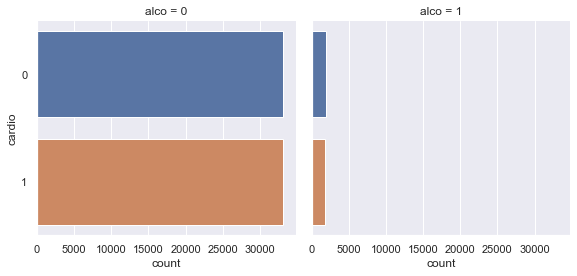

In [105]:
# breakdown of patients who consume alcohol and have cardiovascular disease
sb.catplot(y = 'cardio', data = alcohol_jointDF, col = 'alco', kind = 'count', col_wrap = 3, height = 4)

###### Alcohol Consumption vs presence of Cardiovascular disease (M)

In [106]:
maleNoAlco = maleDF[(maleDF['alco'] == 0)]
maleNoAlco.describe()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,years,bmi,MAP
count,39552.0,39552.000000,39552.000000,39552.000000,39552.000000,39552.000000,39552.000000,39552.000000,39552.0,39552.000000,39552.000000,39552.000000,39552.000000,39552.000000
mean,1.0,161.612839,71.907382,125.329971,80.736802,1.369362,1.228964,0.013779,0.0,0.801300,0.491075,53.542981,27.578760,95.601192
std,0.0,6.590912,11.827321,13.937021,8.333253,0.684569,0.579161,0.116575,0.0,0.399027,0.499927,6.626562,4.590192,9.417094
min,1.0,120.000000,30.000000,100.000000,60.000000,1.000000,1.000000,0.000000,0.0,0.000000,0.000000,30.000000,20.028842,73.333333
25%,1.0,157.000000,64.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.0,1.000000,0.000000,50.000000,23.936062,93.333333
50%,1.0,162.000000,70.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.0,1.000000,0.000000,54.000000,26.619343,93.333333
75%,1.0,166.000000,79.000000,130.000000,90.000000,2.000000,1.000000,0.000000,0.0,1.000000,1.000000,58.000000,30.483158,103.333333
max,1.0,198.000000,129.000000,163.000000,100.000000,3.000000,3.000000,1.000000,0.0,1.000000,1.000000,65.000000,41.091387,121.000000


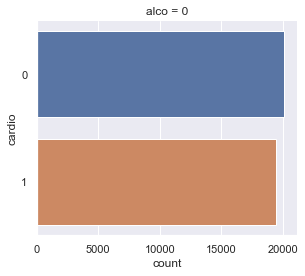

In [107]:
# breakdown of male consumption of alcohol vs presence of cardiovascular disease
sb.catplot(y = 'cardio', data = maleNoAlco, col = 'alco', kind = 'count', col_wrap = 3, height = 4)

In [108]:
maleNoAlco.query('cardio ==0').count()

gender         20129
height         20129
weight         20129
ap_hi          20129
ap_lo          20129
cholesterol    20129
gluc           20129
smoke          20129
alco           20129
active         20129
cardio         20129
years          20129
bmi            20129
MAP            20129
dtype: int64

In [109]:
maleNoAlco.query('cardio ==1').count()

gender         19423
height         19423
weight         19423
ap_hi          19423
ap_lo          19423
cholesterol    19423
gluc           19423
smoke          19423
alco           19423
active         19423
cardio         19423
years          19423
bmi            19423
MAP            19423
dtype: int64

In [110]:
maleAlco = maleDF[(maleDF['alco'] == 1)]
maleAlco.describe()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,years,bmi,MAP
count,1002.0,1002.000000,1002.000000,1002.000000,1002.000000,1002.000000,1002.000000,1002.000000,1002.0,1002.000000,1002.000000,1002.000000,1002.000000,1002.000000
mean,1.0,161.240519,75.517864,126.441118,81.410180,1.555888,1.274451,0.140719,1.0,0.831337,0.480040,52.763473,29.064084,96.420492
std,0.0,6.616136,13.209006,14.364981,8.693494,0.767321,0.594283,0.347905,0.0,0.374641,0.499851,6.666521,4.875632,9.729220
min,1.0,140.000000,40.000000,100.000000,60.000000,1.000000,1.000000,0.000000,1.0,0.000000,0.000000,39.000000,20.069204,73.333333
25%,1.0,157.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,1.0,1.000000,0.000000,48.000000,25.209201,91.666667
50%,1.0,160.000000,75.000000,120.000000,80.000000,1.000000,1.000000,0.000000,1.0,1.000000,0.000000,54.000000,28.577961,93.333333
75%,1.0,165.000000,85.000000,140.000000,90.000000,2.000000,1.000000,0.000000,1.0,1.000000,1.000000,58.000000,32.744928,103.333333
max,1.0,185.000000,134.000000,162.000000,100.000000,3.000000,3.000000,1.000000,1.0,1.000000,1.000000,65.000000,41.091387,120.000000


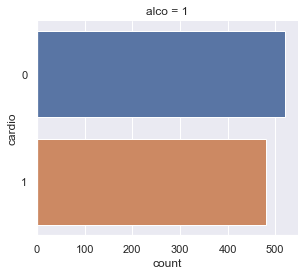

In [111]:
# breakdown of male consumption of alcohol vs presence of cardiovascular disease
sb.catplot(y = 'cardio', data = maleAlco, col = 'alco', kind = 'count', col_wrap = 3, height = 4)

In [112]:
maleAlco.query('cardio ==1').count()

gender         481
height         481
weight         481
ap_hi          481
ap_lo          481
cholesterol    481
gluc           481
smoke          481
alco           481
active         481
cardio         481
years          481
bmi            481
MAP            481
dtype: int64

In [113]:
maleAlco.query('cardio ==0').count()

gender         521
height         521
weight         521
ap_hi          521
ap_lo          521
cholesterol    521
gluc           521
smoke          521
alco           521
active         521
cardio         521
years          521
bmi            521
MAP            521
dtype: int64

###### Alcohol Consumption vs presence of Cardiovascular disease (F)

In [114]:
femaleNoAlco = femaleDF[(femaleDF['alco'] == 0)]
femaleNoAlco.describe()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,years,bmi,MAP
count,19285.0,19285.000000,19285.000000,19285.000000,19285.000000,19285.000000,19285.000000,19285.000000,19285.0,19285.000000,19285.000000,19285.000000,19285.000000,19285.000000
mean,2.0,169.955198,76.643801,127.336531,82.212341,1.315271,1.202074,0.163910,0.0,0.801400,0.500596,53.197252,26.487323,97.253738
std,0.0,6.648879,12.037961,13.863650,7.502317,0.643653,0.545080,0.370203,0.0,0.398956,0.500013,6.947247,3.552949,8.849534
min,2.0,125.000000,40.000000,100.000000,69.000000,1.000000,1.000000,0.000000,0.0,0.000000,0.000000,39.000000,19.921875,79.333333
25%,2.0,165.000000,68.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.0,1.000000,0.000000,48.000000,23.875115,93.333333
50%,2.0,170.000000,75.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.0,1.000000,1.000000,54.000000,25.854639,93.333333
75%,2.0,174.000000,84.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.0,1.000000,1.000000,59.000000,28.713211,103.333333
max,2.0,198.000000,128.000000,170.000000,100.000000,3.000000,3.000000,1.000000,0.0,1.000000,1.000000,65.000000,36.934160,123.333333


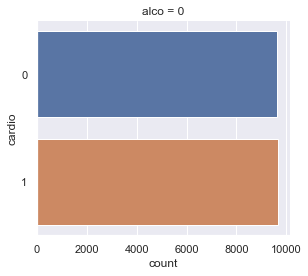

In [115]:
# breakdown of male consumption of alcohol vs presence of cardiovascular disease
sb.catplot(y = 'cardio', data = femaleNoAlco, col = 'alco', kind = 'count', col_wrap = 3, height = 4)

In [116]:
femaleNoAlco.query('cardio ==0').count()

gender         9631
height         9631
weight         9631
ap_hi          9631
ap_lo          9631
cholesterol    9631
gluc           9631
smoke          9631
alco           9631
active         9631
cardio         9631
years          9631
bmi            9631
MAP            9631
dtype: int64

In [117]:
femaleNoAlco.query('cardio ==1').count()

gender         9654
height         9654
weight         9654
ap_hi          9654
ap_lo          9654
cholesterol    9654
gluc           9654
smoke          9654
alco           9654
active         9654
cardio         9654
years          9654
bmi            9654
MAP            9654
dtype: int64

In [118]:
femaleAlco = femaleDF[(femaleDF['alco'] == 1)]
femaleAlco.describe()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,years,bmi,MAP
count,2215.0,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.0,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000
mean,2.0,170.633860,78.244289,128.805418,83.112415,1.395034,1.213544,0.652370,1.0,0.853273,0.466817,52.442438,26.829748,98.343416
std,0.0,6.646516,12.301871,14.803121,8.105587,0.674529,0.540999,0.476325,0.0,0.353913,0.499010,6.789865,3.627688,9.536622
min,2.0,150.000000,49.000000,100.000000,70.000000,1.000000,1.000000,0.000000,1.0,0.000000,0.000000,39.000000,19.943213,80.000000
25%,2.0,167.000000,69.000000,120.000000,80.000000,1.000000,1.000000,0.000000,1.0,1.000000,0.000000,47.000000,24.092971,93.333333
50%,2.0,170.000000,77.000000,120.000000,80.000000,1.000000,1.000000,1.000000,1.0,1.000000,0.000000,53.000000,26.395803,96.666667
75%,2.0,175.000000,86.000000,140.000000,90.000000,2.000000,1.000000,1.000000,1.0,1.000000,1.000000,58.000000,29.320988,106.666667
max,2.0,193.000000,121.000000,170.000000,100.000000,3.000000,3.000000,1.000000,1.0,1.000000,1.000000,65.000000,36.844240,123.333333


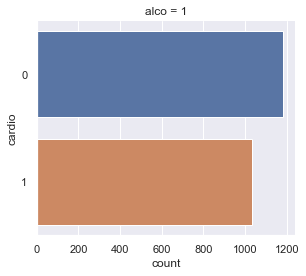

In [119]:
# breakdown of female consumption of alcohol vs presence of cardiovascular disease
sb.catplot(y = 'cardio', data = femaleAlco, col = 'alco', kind = 'count', col_wrap = 3, height = 4)

In [120]:
femaleAlco.query('cardio ==0').count()

gender         1181
height         1181
weight         1181
ap_hi          1181
ap_lo          1181
cholesterol    1181
gluc           1181
smoke          1181
alco           1181
active         1181
cardio         1181
years          1181
bmi            1181
MAP            1181
dtype: int64

In [121]:
femaleAlco.query('cardio ==1').count()

gender         1034
height         1034
weight         1034
ap_hi          1034
ap_lo          1034
cholesterol    1034
gluc           1034
smoke          1034
alco           1034
active         1034
cardio         1034
years          1034
bmi            1034
MAP            1034
dtype: int64